## What is the minimun number of die rolls needed to win the game "Snakes and Ladders"?

### To find out, let's simulate the game.

In [1]:
import random
import statistics
import datetime


class Board():
    """A class representing the game's board."""
    def __init__(self):
        """Create the board."""
        self.ladders = {1: 38, 4: 14, 9: 31, 21: 42, 28: 84, 36: 44, 51: 67, 71: 91, 80:100}
        self.snakes = {16: 6, 48: 30, 64: 60, 79: 19, 93: 68, 95: 24, 97: 76, 98: 78}
        self.squares = {num: 'empty' for num in range(1, 101)}
    
    def update_board(self, player_position, player_name, player_prev_position):
        """Returns the updated board after each move."""
        self.squares[player_position] = player_name
        self.squares[player_prev_position] = 'empty'
        
class Die():
    """A class representing a single D6 die."""
    def __init__(self):
        self.num_sides = 6

    def roll(self):
        """Return a random value between 1 and num_sides."""
        return random.randint(1, self.num_sides)

class Player(Die):
    """A class representing a player."""
    def __init__(self, name):
        super().__init__()
        self.name = name
        self.position = 0
        self.all_positions = [0]
  
    def move(self, die_roll):
        """ (int) -> int
        Return the new position of player after rolling the die."""
        self.position += die_roll
        return self.position
    
    def landing(self, current_square, board):
        """ (self.position, Board object) -> self.position
        Evaluate the board and return where the player 'lands'."""
        if current_square > 100:
            n = current_square - 100
            self.position = 100 - n
            current_square = self.position
                    
        if current_square in board.ladders.keys():
            self.position = board.ladders[current_square]
        elif current_square in board.snakes.keys():
            self.position = board.snakes[current_square]
        
        if board.squares[current_square] != 'empty':
            self.position = 0
        
        self.all_positions.append(self.position)


    def win(self):
        """Return True if Player has reached the 100th square of the board."""
        if self.position == 100:
            return True


def play_game(players):
    """
    (dict) -> stats
    Runs a simulation of one game.
    Returns the winner's name and the number of times she had to roll the die to win.
    """
    board = Board()
    counter = 0
    
    while board.squares[100] == 'empty':
        counter += 1
        # print("round", counter)
        for player in players.keys():
            current_square = players[player].move(players[player].roll())
            players[player].landing(current_square, board)
            player_position = players[player].position
            player_name = players[player].name
            player_prev_position = players[player].all_positions[-1]
            # print(player_name, player_position, players[player].all_positions)
            board.update_board(player_position, player_name, player_prev_position)
            if players[player].win():
                # print("{} wins!".format(players[player].name))
                board.squares[100] = players[player].name
                break

    return players[player].name, counter

def play_simulations(players, num_of_simul):
    """
    (dict, int) -> dict
    k:v -> 'Player n':[list of die roll counts]   
    Returns a dictionary with the result of num_of_simul simulations for players.
    """
    results = {}
    
    for player in players:
        results[players[player].name] = []
    
    for n in range(num_of_simul):
        result = play_game(players)
        results[result[0]].append(result[1])
        # reset player's position attributes before next game
        for player in players:
            players[player].position = 0
            players[player].all_positions = []
    
    return results

In [2]:
### GAME SIMULATION STARTS HERE
start = datetime.datetime.now()
# Create players
players_4 = {1: Player('Player 1'), 2: Player('Player 2'), 3: Player('Player 3'), 4: Player('Player 4')}
players_3 = {key:players_4[key] for key in [1, 2, 3]}
players_2 = {key:players_4[key] for key in [1, 2]}
player_1 = {key:players_4[key] for key in [1]}

playing = [player_1, players_2, players_3, players_4]

all_results = []

for n in range(len(playing)):
    all_results.append(play_simulations(playing[n], 100))     
    all_results.append(play_simulations(playing[n], 1000))      
    all_results.append(play_simulations(playing[n], 10000))

end = datetime.datetime.now()
runtime = (end - start).seconds
print("runtime: ", runtime, " seconds.")

runtime:  16


In [20]:
# for i, l in enumerate(all_results):
#     print(i, '\t', l)

# len(all_results)  # 12
# 0 1 2   1 player
# 3 4 5   2 players
# 6 7 8   3 players
# 9 10 11 4 players

len(all_results[11]['Player 4'])

2417

#### Now, let's take a look at the results:

create df, etc

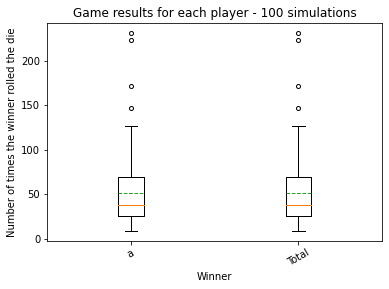

In [3]:
# Plot the results  FROM df!!!!!!!!!!!!!
import matplotlib.pyplot as plt

data = [value for value in results.values()]
names = [key for key in results.keys()]
# color='black', marker='o', markersize=3,
# legend = mlines.Line2D([], [], label='Number of simulations: {}'.format(num_simul))
flierprops = dict(marker='o', markersize=4)
fig1, ax1 = plt.subplots()
ax1.set_title("Game results for each player - {} simulations".format(num_simul))
ax1.boxplot(data, flierprops=flierprops, showmeans=True, meanline=True)
ax1.set_xlabel("Winner")
ax1.set_ylabel("Number of times the winner rolled the die")
ax1.set_xticklabels(names, rotation=30, fontsize=10)
# ax1.legend(handles=[legend], frameon=False, bbox_to_anchor=(1.05, 1), loc='upper center')
plt.show()

As we can see, no matter how many players are playing, sometimes you can really end up trapped in this seemingly never ending game.